# Lab Work: Developing and Comparing AI Models for Android Malware Detection

## Objective:
The goal of this lab is to develop and evaluate multiple AI models for detecting Android malware using the provided Android Malware Dataset. Students will choose at least three different machine learning or deep learning algorithms to compare their performance in classifying Android applications as benign or malicious.

## Dataset Overview:
The **Android Malware Dataset for Machine Learning** contains labeled Android APK samples, classified as benign (goodware) or malicious (e.g., adware, spyware, trojans). It includes various features extracted from the APKs, such as requested permissions, API calls, system behaviors, and more, which can be used to train machine learning models.

## Tasks:

1. **Data Preprocessing**:
   - Load the dataset and clean it by handling missing values and converting categorical features into numerical ones if necessary.
   - Split the data into training and testing sets.

2. **Model Development**:
   - Choose at least **three AI algorithms** of your choice (e.g., Logistic Regression, Random Forest, SVM, Neural Networks, XGBoost, etc.).
   - Train each model on the dataset and evaluate their performance using accuracy, precision, recall, F1-score, and confusion matrix.

3. **Model Comparison**:
   - Compare the models based on their performance metrics.
   - Analyze which model performs best and why.

4. **Optional (Hyperparameter Tuning)**:
   - Optionally, apply techniques like grid search to optimize the model’s hyperparameters.


## Resources:
- Kaggle Dataset: [Android Malware Dataset for Machine Learning](https://www.kaggle.com/datasets/shashwatwork/android-malware-dataset-for-machine-learning)

You need to login in Kaggle to get access to the dataset.


In [ ]:
#
#
#
#
# Your code to develop AI model for malware classification.
# Hint: Use the example code provided in previous lab.
#
#
#
#

In [2]:
!pip install xgboost

   --------------------------------------- 124.9/124.9 MB 17.9 MB/s eta 0:00:00
   ---------------------------------------- 14.9/14.9 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 2.2.1 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import tensorflow as tf
from tensorflow import keras
import xgboost as xgb

### Load Dataset

In [2]:
df = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', low_memory=False)

In [3]:
df.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [4]:
df.shape

(15036, 216)

In [5]:
df.describe

<bound method NDFrame.describe of        transact  onServiceConnected  bindService  attachInterface  \
0             0                   0            0                0   
1             0                   0            0                0   
2             0                   0            0                0   
3             0                   0            0                0   
4             0                   0            0                0   
...         ...                 ...          ...              ...   
15031         1                   1            1                1   
15032         0                   0            0                0   
15033         0                   0            0                0   
15034         1                   1            1                1   
15035         1                   1            1                1   

       ServiceConnection  android.os.Binder  SEND_SMS  \
0                      0                  0         1   
1                      

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


### Clean the data (handling missing values and converting categorical features into numerical ones)

In [7]:
df = df.dropna()

In [8]:
df.shape

(15036, 216)

In [9]:
object_columns  = df.select_dtypes(include='object').columns
print(object_columns)

Index(['TelephonyManager.getSimCountryIso', 'class'], dtype='object')


In [10]:
print(df['TelephonyManager.getSimCountryIso'])

0        0
1        0
2        0
3        0
4        0
        ..
15031    1
15032    0
15033    0
15034    0
15035    1
Name: TelephonyManager.getSimCountryIso, Length: 15036, dtype: object


In [11]:
encoder = LabelEncoder()

#classs column: B=Benign; S=Malware
df['class'] = encoder.fit_transform(df['class'])

df['TelephonyManager.getSimCountryIso'] = encoder.fit_transform(df['TelephonyManager.getSimCountryIso'])

In [12]:
df.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [13]:
df.tail()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0
15035,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,1,1,0,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int32(2), int64(214)
memory usage: 24.7 MB


### Split the data into training and testing sets.

In [15]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Development

In [16]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

#### Random Forest

Random Forest Accuracy: 0.9886968085106383
Random Forest Precision: 0.9937777777777778
Random Forest Recall: 0.9764192139737992
Random Forest F1-Score: 0.9850220264317181
Random Forest Performance
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1863
           1       0.99      0.98      0.99      1145

    accuracy                           0.99      3008
   macro avg       0.99      0.99      0.99      3008
weighted avg       0.99      0.99      0.99      3008

Random Forest Confusion Matrix



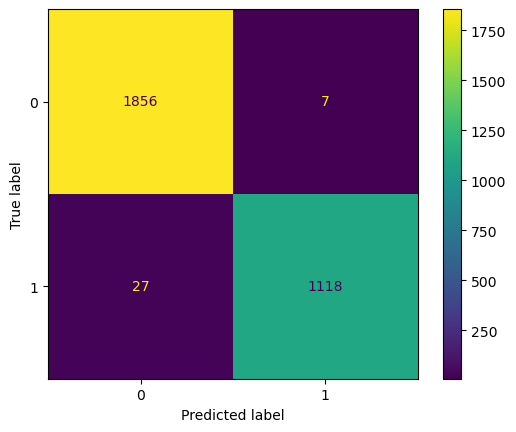

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
accuracy_list.append(accuracy_score(y_test, y_pred_rf))

print("Random Forest Precision:", precision_score(y_test, y_pred_rf))
precision_list.append(precision_score(y_test, y_pred_rf))

print("Random Forest Recall:", recall_score(y_test, y_pred_rf))
recall_list.append(recall_score(y_test, y_pred_rf))

print("Random Forest F1-Score:", f1_score(y_test, y_pred_rf))
f1_score_list.append(f1_score(y_test, y_pred_rf))

print("Random Forest Performance\n" , classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix\n")
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.show()

#### SVM (Support Vector Machine)

SVM Accuracy: 0.9777260638297872
SVM Precision: 0.9736379613356766
SVM Recall: 0.9676855895196507
SVM F1-Score: 0.970652650021901
SVM Performance               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1863
           1       0.97      0.97      0.97      1145

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008

SVM Confusion Matrix



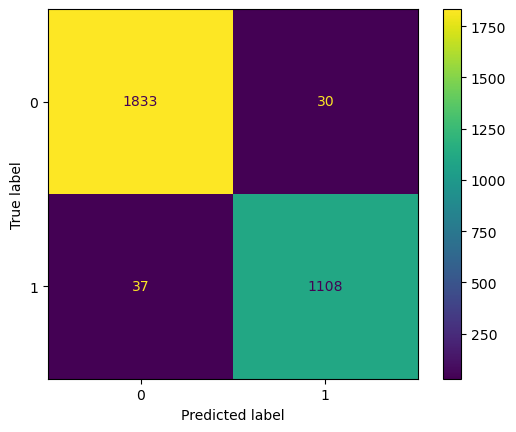

In [18]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
accuracy_list.append(accuracy_score(y_test, y_pred_svm))

print("SVM Precision:", precision_score(y_test, y_pred_svm))
precision_list.append(precision_score(y_test, y_pred_svm))

print("SVM Recall:", recall_score(y_test, y_pred_svm))
recall_list.append(recall_score(y_test, y_pred_svm))

print("SVM F1-Score:", f1_score(y_test, y_pred_svm))
f1_score_list.append(f1_score(y_test, y_pred_svm))

print("SVM Performance" , classification_report(y_test, y_pred_svm))

print("SVM Confusion Matrix\n")
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svm)
disp.plot()
plt.show()

#### XGBoost

XGBoost Accuracy: 0.9867021276595744
XGBoost Precision: 0.9850746268656716
XGBoost Recall: 0.9799126637554585
XGBoost F1-Score: 0.9824868651488615
XGBoost Performance               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1863
           1       0.99      0.98      0.98      1145

    accuracy                           0.99      3008
   macro avg       0.99      0.99      0.99      3008
weighted avg       0.99      0.99      0.99      3008

XGBoost Confusion Matrix



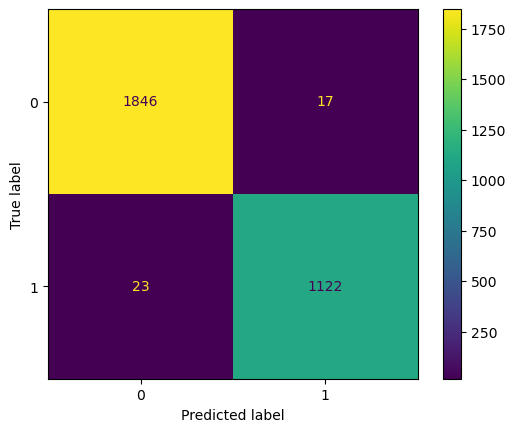

In [19]:
xgboost = xgb.XGBClassifier(n_estimators=100)
xgboost.fit(X_train, y_train)
y_pred_xgboost = xgboost.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgboost))
accuracy_list.append(accuracy_score(y_test, y_pred_xgboost))

print("XGBoost Precision:", precision_score(y_test, y_pred_xgboost))
precision_list.append(precision_score(y_test, y_pred_xgboost))

print("XGBoost Recall:", recall_score(y_test, y_pred_xgboost))
recall_list.append(recall_score(y_test, y_pred_xgboost))

print("XGBoost F1-Score:", f1_score(y_test, y_pred_xgboost))
f1_score_list.append(f1_score(y_test, y_pred_xgboost))

print("XGBoost Performance" , classification_report(y_test, y_pred_xgboost))

print("XGBoost Confusion Matrix\n")
confusion_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_xgboost)
disp.plot()
plt.show()

#### Graph Comparing the Performances

In [20]:
#https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/ & ChatGPT are used.

graph_data = {'ai_models':['Random Forest', 'SVM', 'XGBoost'],
              'Accuracy':accuracy_list,
               'Precision':precision_list,
               'Recall':recall_list,
               'F1-Score':f1_score_list
              }

graph_df  = pd.DataFrame(graph_data)

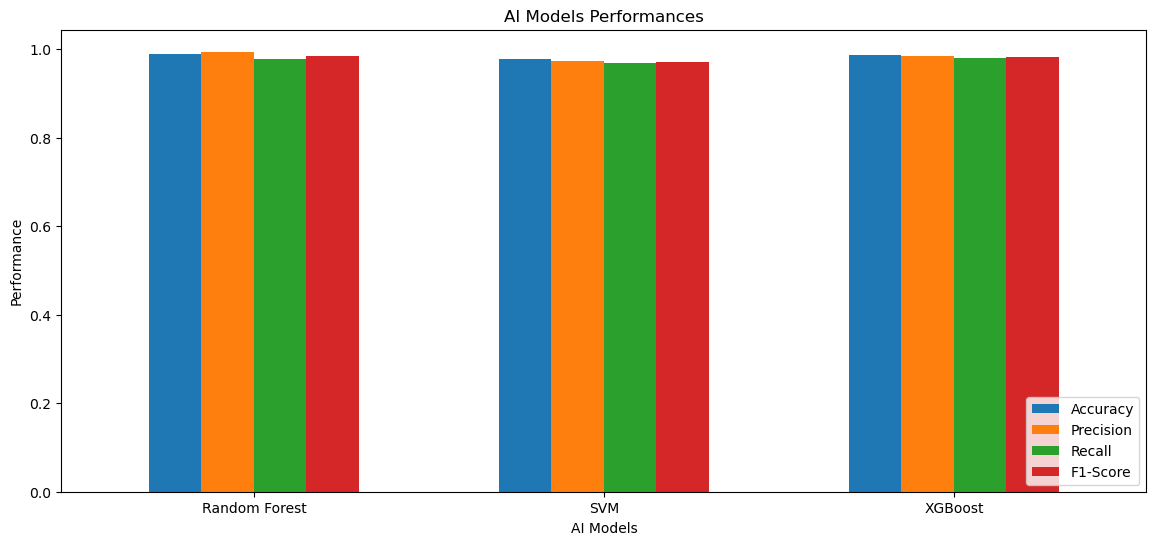

In [24]:
graph_df.set_index('ai_models', inplace=True)
graph_df.plot(kind='bar', figsize=(14,6), width=0.6)

plt.title('AI Models Performances')
plt.ylabel('Performance')
plt.xlabel('AI Models')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

**Lab Logbook requirement**: Provide a graph comparing the performance of the AI model that you have developed.